In [1]:
import os

import matplotlib.pyplot as plt

import h5py
import numpy as np

Available Scenarios: <KeysViewHDF5 ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '4', '5', '6', '7', '8', '9', 'labels']>

Available Signals: <KeysViewHDF5 ['eigs', 'gen_Bus_1_1', 'time']>

Available Internal Measurements: <KeysViewHDF5 ['VOTHSG']>



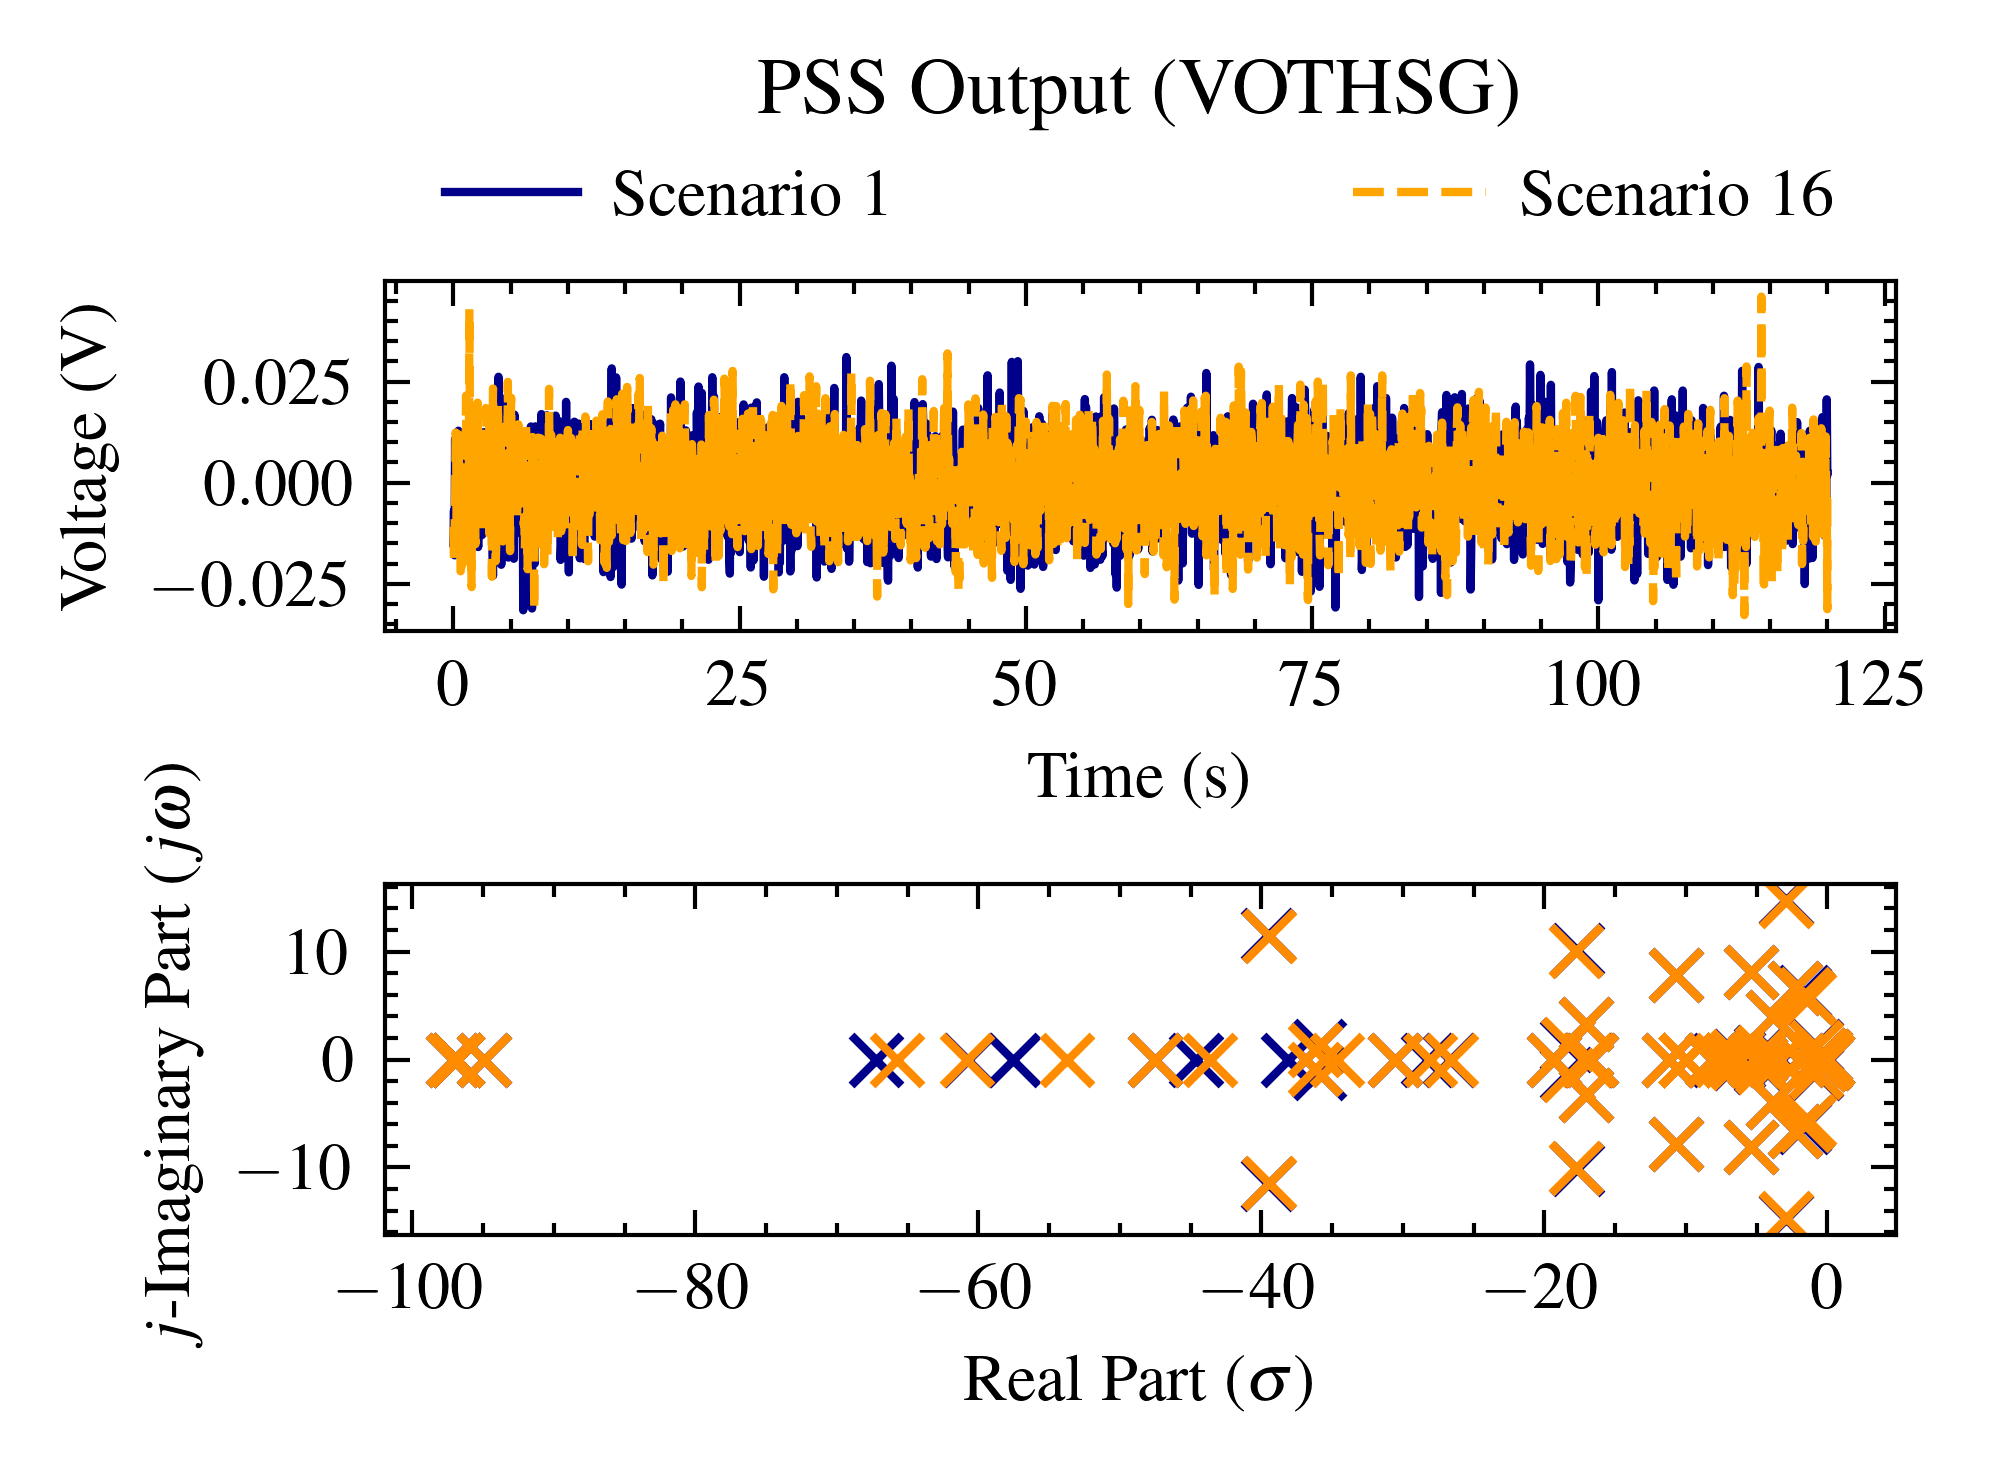

In [4]:
filepath = os.path.join(os.getcwd(), 'IEEE14_generators_20220526190314_4eaa02.hdf5')

with h5py.File(filepath, "r") as f:
    
    # Listing the available scenarios
    print("Available Scenarios: %s\n" % f.keys())
    
    # Getting the list of scenarios (and labels for all of them)
    a_group_key = list(f.keys())[0]

    # Get the data
    print("Available Signals: %s\n" % f[a_group_key].keys())
    b_group_key = list(f[a_group_key].keys())[1]
    
    # Get an internal measurement from the generator
    print("Available Internal Measurements: %s\n" % f[a_group_key][b_group_key].keys())

    # ------------------------------
    # Time vector
    # ------------------------------
    # Scenario 1
    t1 = f['1/time']
    t1 = t1[:] # extracting data from DataSet class
    
    # Scenario 16
    t16 = f['16/time']
    t16 = t16[:] # extracting data from DataSet class
    
    # ------------------------------
    # Eigenvalues
    # ------------------------------
    eigs1initial = f['1']['eigs/initial']
    eigs1initial = eigs1initial[:]
    eigs16final = f['16/eigs/final']
    eigs16final = eigs16final[:]
    
    # ------------------------------
    # PSS Output
    # ------------------------------
    PSSoutput1 = f['1/gen_Bus_1_1/VOTHSG']
    PSSoutput1 = PSSoutput1[:]
    
    PSSoutput16 = f['16/gen_Bus_1_1/VOTHSG']
    PSSoutput16 = PSSoutput16[:]
    
    # ------------------------------
    # Plotting results
    # ------------------------------
    
    fig, ax = plt.subplots(nrows = 2, ncols = 1)
    fig.canvas.draw()

    ax[0].plot(t1, PSSoutput1, label = 'Scenario 1', color = 'darkblue')
    ax[0].plot(t16, PSSoutput16, label = 'Scenario 16', color = 'orange')
    ax[0].set_title('PSS Output (VOTHSG)', pad = 20)
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel('Voltage (V)')
    ax[0].legend(loc = 'upper left')

    ax[1].scatter(np.real(eigs1initial), np.imag(eigs1initial), color = 'darkblue', marker = 'x', label = 'Scenario 1')
    ax[1].scatter(np.real(eigs16final), np.imag(eigs16final), color = 'darkorange', marker = 'x', label = 'Scenario 16')
    # ax[1].set_title("Eigenvalues", pad = 20)
    # ax[1].legend(loc = 'upper left')
    ax[1].set_xlabel("Real Part ($\sigma$)")
    ax[1].set_ylabel("$j$-Imaginary Part ($j\omega$)")

     # Getting labels for first plot
    _lines, _labels = ax[0].get_legend_handles_labels()

    # Other experiments
    ax[0].legend(_lines, _labels, bbox_to_anchor = (0, 0.975, 1, 0.2),
                loc = 'lower left', mode = 'expand', ncol = 2, handletextpad = 0.52)

    fig.tight_layout()
    fig.savefig('fig_extract-results-example.png', dpi = 300, transparent = True)

    f.close()